## Notebook to debug my stock predictor

In [1]:
"""
The goal of this project will use AI & ML to predict stock prices. I will a LLM for sentiment analysis and time series analysis to predict stock prices.
"""

# Import Libraries

# Fiancial Data
import yfinance as yf
from finvizfinance.quote import finvizfinance

# Data Manipulation
import pandas as pd
import numpy as np

import holidays

# Data Modeling Library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Charts
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Web App UI
#import streamlit as st

# Connect to OpenAI API
from openai import OpenAI
from config import my_sk

#openai.api_key = my_sk

# setup api client
client = OpenAI(api_key=my_sk)

# Open AI API Call using the LLM to classify text

In [3]:
def classify_sentiment(title):
    response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a sentiment classifier."},
                {"role": "user", "content": f"Classify the sentiment as 'POSITIVE' or 'NEGATIVE' or 'NEUTRAL' with just that one word only, no additional words or reasoning: {title}"},
            ],
        max_tokens=1,
        n=1,
        temperature=0.5
    )
    return response.choices[0].message.content# Directly access the .content attribute


In [4]:
#testing the classify_sentiment function    
classify_sentiment("IBM had an amazing run but tanked at the end of the day")

'NEG'

-- Now we want to get the data

In [5]:
ticker = input("Enter a stock ticker: ").lower()

In [6]:
# Import Data using the APIs
# Data Pull
stock = finvizfinance(ticker) 
news_df = stock.ticker_news()



In [15]:
print(news_df.head())
news_df.describe()

                 Date                                              Title  \
0 2024-11-21 08:30:00  porch group to host investor day on december 5...   
1 2024-11-19 08:00:00  porch group announces strategic home factors p...   
2 2024-11-12 06:46:00  porch group price target raised to $5 from $4 ...   
3 2024-11-11 11:00:00  porch group announces attendance at upcoming i...   
4 2024-11-07 16:01:00     porch group reports third quarter 2024 results   

                                                Link         Source sentiment  \
0  https://www.businesswire.com/news/home/2024112...  Business Wire        NE   
1  https://www.businesswire.com/news/home/2024111...  Business Wire        NE   
2  https://finance.yahoo.com/news/porch-group-pri...       TipRanks       POS   
3  https://www.businesswire.com/news/home/2024111...  Business Wire        NE   
4  https://www.businesswire.com/news/home/2024110...  Business Wire        NE   

     DateOnly  
0  2024-11-21  
1  2024-11-19  
2  2024-

,Date
count,100
mean,2023-08-01 21:10:47.999999744
min,2022-10-04 16:15:00
25%,2023-01-13 00:54:30
50%,2023-03-17 12:47:00
75%,2024-03-07 22:06:15
max,2024-11-21 08:30:00


In [8]:
# Preprocess before putting into LLM
news_df['Title'] = news_df['Title'].str.lower()

# Classify Sentiment function applied to each row of news_df
news_df['sentiment'] = news_df['Title'].apply(classify_sentiment)

# Postprocess after putting into LLM
news_df['sentiment'] = news_df['sentiment'].str.upper()
news_df = news_df[news_df['sentiment'] != 'NEUTRAL']
news_df['Date'] = pd.to_datetime(news_df['Date'])
news_df['DateOnly'] = news_df['Date'].dt.date

In [9]:
print(news_df.head())

                 Date                                              Title  \
0 2024-11-21 08:30:00  porch group to host investor day on december 5...   
1 2024-11-19 08:00:00  porch group announces strategic home factors p...   
2 2024-11-12 06:46:00  porch group price target raised to $5 from $4 ...   
3 2024-11-11 11:00:00  porch group announces attendance at upcoming i...   
4 2024-11-07 16:01:00     porch group reports third quarter 2024 results   

                                                Link         Source sentiment  \
0  https://www.businesswire.com/news/home/2024112...  Business Wire        NE   
1  https://www.businesswire.com/news/home/2024111...  Business Wire        NE   
2  https://finance.yahoo.com/news/porch-group-pri...       TipRanks       POS   
3  https://www.businesswire.com/news/home/2024111...  Business Wire        NE   
4  https://www.businesswire.com/news/home/2024110...  Business Wire        NE   

     DateOnly  
0  2024-11-21  
1  2024-11-19  
2  2024-

-- Create the function to classify sentiment on the ticker

In [10]:
# Data Pull
#ticker = 'AAPL'
stock = finvizfinance(ticker) 
news_df = stock.ticker_news()

    # Preprocess before putting into LLM
news_df['Title'] = news_df['Title'].str.lower()

    # Classify Sentiment function applied to each row of news_df
news_df['sentiment'] = news_df['Title'].apply(classify_sentiment)

    # Postprocess after putting into LLM
news_df['sentiment'] = news_df['sentiment'].str.upper()
news_df = news_df[news_df['sentiment'] != 'NEUTRAL']
news_df['Date'] = pd.to_datetime(news_df['Date'])
news_df['DateOnly'] = news_df['Date'].dt.date


In [11]:
print(news_df.head())
news_df['sentiment'].value_counts()
news_df 

                 Date                                              Title  \
0 2024-11-21 08:30:00  porch group to host investor day on december 5...   
1 2024-11-19 08:00:00  porch group announces strategic home factors p...   
2 2024-11-12 06:46:00  porch group price target raised to $5 from $4 ...   
3 2024-11-11 11:00:00  porch group announces attendance at upcoming i...   
4 2024-11-07 16:01:00     porch group reports third quarter 2024 results   

                                                Link         Source sentiment  \
0  https://www.businesswire.com/news/home/2024112...  Business Wire        NE   
1  https://www.businesswire.com/news/home/2024111...  Business Wire        NE   
2  https://finance.yahoo.com/news/porch-group-pri...       TipRanks       POS   
3  https://www.businesswire.com/news/home/2024111...  Business Wire        NE   
4  https://www.businesswire.com/news/home/2024110...  Business Wire        NE   

     DateOnly  
0  2024-11-21  
1  2024-11-19  
2  2024-

,Date,Title,Link,Source,sentiment,DateOnly
0,2024-11-21 08:30:00,porch group to host investor day on december 5...,https://www.businesswire.com/news/home/2024112...,Business Wire,NE,2024-11-21
1,2024-11-19 08:00:00,porch group announces strategic home factors p...,https://www.businesswire.com/news/home/2024111...,Business Wire,NE,2024-11-19
2,2024-11-12 06:46:00,porch group price target raised to $5 from $4 ...,https://finance.yahoo.com/news/porch-group-pri...,TipRanks,POS,2024-11-12
3,2024-11-11 11:00:00,porch group announces attendance at upcoming i...,https://www.businesswire.com/news/home/2024111...,Business Wire,NE,2024-11-11
4,2024-11-07 16:01:00,porch group reports third quarter 2024 results,https://www.businesswire.com/news/home/2024110...,Business Wire,NE,2024-11-07
...,...,...,...,...,...,...
95,2022-10-27 10:12:00,"v12, a porch group company, partners with stra...",https://finance.yahoo.com/news/v12-porch-group...,PR Newswire,NE,2022-10-27
96,2022-10-12 16:05:00,porch group sets third quarter 2022 earnings c...,https://finance.yahoo.com/news/porch-group-set...,GlobeNewswire,NE,2022-10-12
97,2022-10-11 08:52:00,"v12, a porch group company, publishes 2022 new...",https://finance.yahoo.com/news/v12-porch-group...,PR Newswire,NE,2022-10-11
98,2022-10-06 09:15:00,"the porch group debuts the wraparound, a new p...",https://finance.yahoo.com/news/porch-group-deb...,Business Wire,POS,2022-10-06


In [13]:
# Function to group and process sentiment data

# Reshape data to have df with columns: Date, # of positive Articles, # of negative Articles
grouped = news_df.groupby(['DateOnly', 'sentiment']).size().unstack(fill_value=0)
grouped = grouped.reindex(columns=['POS', 'NEG'], fill_value=0)

# Create rolling averages that count number of positive and negative sentiment articles within past t days
grouped['7day_avg_positive'] = grouped['POS'].rolling(window=7, min_periods=1).sum()
grouped['7day_avg_negative'] = grouped['NEG'].rolling(window=7, min_periods=1).sum()

# Create "Percent Positive" by creating percentage measure
grouped['7day_pct_positive'] = grouped['POS'] / (grouped['POS'] + grouped['NEG'])
result_df = grouped.reset_index()

print(result_df.head())
result_df

sentiment    DateOnly  POS  NEG  7day_avg_positive  7day_avg_negative  \
0          2022-10-04    0    0                0.0                0.0   
1          2022-10-06    1    0                1.0                0.0   
2          2022-10-11    0    0                1.0                0.0   
3          2022-10-12    0    0                1.0                0.0   
4          2022-10-27    0    0                1.0                0.0   

sentiment  7day_pct_positive  
0                        NaN  
1                        1.0  
2                        NaN  
3                        NaN  
4                        NaN  


sentiment,DateOnly,POS,NEG,7day_avg_positive,7day_avg_negative,7day_pct_positive
0,2022-10-04,0,0,0.0,0.0,NaN
1,2022-10-06,1,0,1.0,0.0,1.0
2,2022-10-11,0,0,1.0,0.0,NaN
3,2022-10-12,0,0,1.0,0.0,NaN
4,2022-10-27,0,0,1.0,0.0,NaN
...,...,...,...,...,...,...
87,2024-11-07,0,0,3.0,0.0,NaN
88,2024-11-11,0,0,2.0,0.0,NaN
89,2024-11-12,1,0,3.0,0.0,1.0
90,2024-11-19,0,0,3.0,0.0,NaN


In [ ]:


# Line chart for historical and forecasted stock prices
plt.figure(figsize=(14, 7))
plt.plot(stock_data['DateOnly'], stock_data['Close'], label='Historical Prices')
plt.plot(forecast.index, forecast.predicted_mean, label='Forecasted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Historical and Forecasted Stock Prices')
plt.legend()
plt.show()

# Bar chart for sentiment counts
sentiment_counts = news_df['sentiment'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')
plt.show()

# Rolling average chart for positive and negative sentiment
plt.figure(figsize=(14, 7))
plt.plot(result_df['DateOnly'], result_df['7day_avg_positive'], label='7-day Avg Positive Sentiment')
plt.plot(result_df['DateOnly'], result_df['7day_avg_negative'], label='7-day Avg Negative Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.title('7-day Rolling Average of Sentiment')
plt.legend()
plt.show()

# Percentage positive sentiment chart
plt.figure(figsize=(14, 7))
plt.plot(result_df['DateOnly'], result_df['7day_pct_positive'], label='7-day % Positive Sentiment')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('7-day Percentage of Positive Sentiment')
plt.legend()
plt.show()

sentiment    DateOnly  POS  NEG  7day_avg_positive  7day_avg_negative  \
0          2022-10-04    0    0                0.0                0.0   
1          2022-10-06    1    0                1.0                0.0   
2          2022-10-11    0    0                1.0                0.0   
3          2022-10-12    0    0                1.0                0.0   
4          2022-10-27    0    0                1.0                0.0   
..                ...  ...  ...                ...                ...   
87         2024-11-07    0    0                3.0                0.0   
88         2024-11-11    0    0                2.0                0.0   
89         2024-11-12    1    0                3.0                0.0   
90         2024-11-19    0    0                3.0                0.0   
91         2024-11-21    0    0                2.0                0.0   

sentiment  7day_pct_positive  
0                        NaN  
1                        1.0  
2                        NaN  

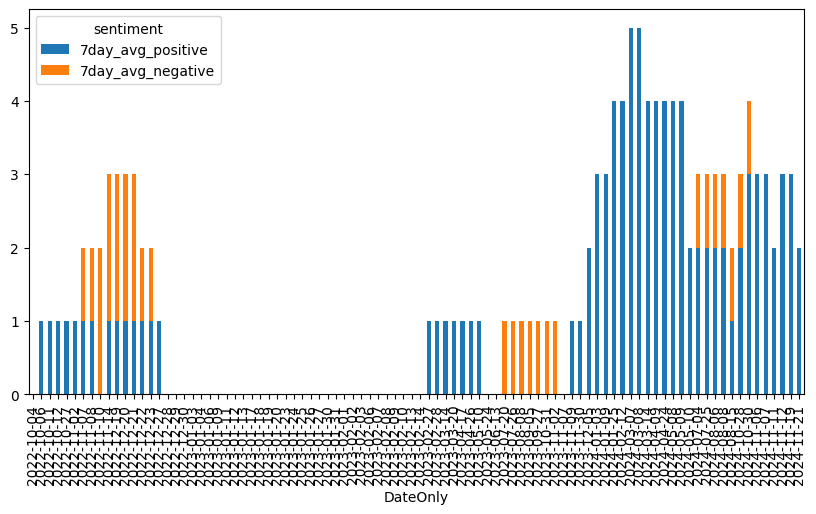

In [14]:
#import matplotlib.pyplot as plt

print(result_df)

# Plot using matplotlib
result_df.plot(x='DateOnly', y=['7day_avg_positive', '7day_avg_negative'], kind='bar', stacked=True, figsize=(10, 5))
plt.show()

In [59]:
import yfinance as yf

ticker = 'AAPL'
start_date = '2024-11-21'
end_date = '2024-11-23'

stock_data = yf.download(ticker, start=start_date, end=end_date, ignore_tz=True)

if stock_data is not None and not stock_data.empty:
	stock_data['Pct_Change'] = stock_data['Close'].pct_change() * 100 
	print(stock_data)  # Display the downloaded data
else:
	print("No data was downloaded.")

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-11-21  228.520004  228.520004  230.160004  225.710007  228.880005   
2024-11-22  229.869995  229.869995  230.720001  228.059998  228.059998   

Price         Volume Pct_Change  
Ticker          AAPL             
Date                             
2024-11-21  42108300        NaN  
2024-11-22  38153300   0.590754  


In [63]:
print(stock_data.head())
stock_data.describe()

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-11-21  228.520004  228.520004  230.160004  225.710007  228.880005   
2024-11-22  229.869995  229.869995  230.720001  228.059998  228.059998   

Price         Volume Pct_Change  
Ticker          AAPL             
Date                             
2024-11-21  42108300        NaN  
2024-11-22  38153300   0.590754  


Price,Adj Close,Close,High,Low,Open,Volume,Pct_Change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,1.000000
mean,229.195000,229.195000,230.440002,226.885002,228.470001,4.013080e+07,0.590754
std,0.954588,0.954588,0.395978,1.661694,0.579833,2.796607e+06,NaN
min,228.520004,228.520004,230.160004,225.710007,228.059998,3.815330e+07,0.590754
25%,228.857502,228.857502,230.300003,226.297504,228.264999,3.914205e+07,0.590754
50%,229.195000,229.195000,230.440002,226.885002,228.470001,4.013080e+07,0.590754
75%,229.532497,229.532497,230.580002,227.472500,228.675003,4.111955e+07,0.590754
max,229.869995,229.869995,230.720001,228.059998,228.880005,4.210830e+07,0.590754
